In [80]:
# Proyecto : 
# Carlos Javier Reyes

# Tratamiento de datos
# ==============================================================================

from bs4 import BeautifulSoup as bs  # Lirerias para web scrapper 
import requests

import pandas as pd  # Librerias para Dataset
import numpy as np # Lbreria Numerical para computacion cientifica, analisis de datos

# Preprocesado y modelado
# ==============================================================================
# Librerias para Algoritmos de Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [81]:
# Web Scrapper Top 40 canciones de Ecuador
# ==============================================================================
url = "https://www.los40.com.ec/lista-los-40"

# Realizamos la petición a la web
req = requests.get(url)

# Comprobamos que la petición nos devuelve un Status Code = 200
status_code = req.status_code
if status_code == 200:

    # Pasamos el contenido HTML de la web a un objeto BeautifulSoup()
    html = bs(req.text, "html.parser")

    # Obtenemos todos los divs donde están las entradas
    entradas = html.find_all('div', {'class': 'item-list'})

    # Recorremos todas las entradas para extraer el título, autor y fecha
    for i, entrada in enumerate(entradas):
        # Con el método "getText()" no nos devuelve el HTML
        titulo = entrada.find('div', {'class': 'title'}).getText()
        autor =  entrada.find('div', {'class': 'author'}).getText()
        album =  entrada.find('div', {'class': 'albun'}).getText()
        numero =  entrada.find('div', {'class': 'number'}).getText()
        # Imprimo el Título, Autor , Album y Puesto cancion
        print ("%d -Cancion:%s -Artista:%s  -Alb:%s -No:%s " % (i +1, titulo, autor, album,numero))
        
else:
    print ("Status Code %d" % status_code)

1 -Cancion:Despechá -Artista:Rosalía  -Alb:Motomami + -No:01 
2 -Cancion:Quevedo: Bzrp music sessions Vol. 52 -Artista:Bizarrap;Quevedo  -Alb:Quevedo: Bzrp music sessions Vol. 52 -No:02 
3 -Cancion:La bachata -Artista:Manuel Turizo  -Alb:La bachata -No:03 
4 -Cancion:Ojos marrones -Artista:Lasso  -Alb:Ojos marrones -No:04 
5 -Cancion:Complete mess -Artista:5 Seconds of Summer  -Alb:Complete mess -No:05 
6 -Cancion:Tú me delatas -Artista:David Bisbal  -Alb:Tú me delatas -No:06 
7 -Cancion:Nublado -Artista:Paulo Londra  -Alb:Nublado -No:07 
8 -Cancion:Boca de loba -Artista:Tres Dedos  -Alb:Boca de loba -No:08 
9 -Cancion:Late night talking -Artista:Harry Styles  -Alb:Harry's house -No:09 
10 -Cancion:Volare -Artista:Danny Ocean  -Alb:Volare -No:10 
11 -Cancion:TV -Artista:Sebastián Yatra  -Alb:TV -No:11 
12 -Cancion:Fui yo -Artista:Mariana Gomez;Mía Terán  -Alb:Fui yo -No:12 
13 -Cancion:Don't you worry -Artista:The Black Eyed Peas;David Guetta;Shakira  -Alb:Don't you worry -No:13 
14 -C

Cantidad de datos:
(891, 12)
(418, 11)
Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

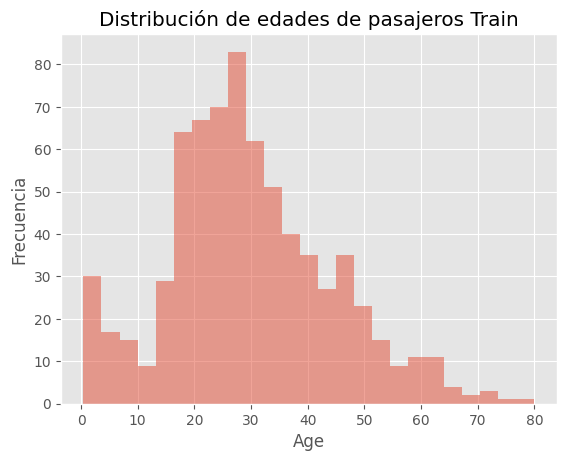

In [116]:
# Machine Learnig: Sobrivientes Titanic
# ==============================================================================
# DataSet 
# cargar datos desde archivo de la pc
df_test = pd.read_csv("E:\\maestria\\dataset\\titanictest.csv")
df_train = pd.read_csv("E:\\maestria\\dataset\\titanictrain.csv")

# Descripción de los campos
# ==============================================================================
# PassengerId: Identificador del pasajero dentro de la tabla
# Survived: Indica si el pasajero sobrevivió
# Pclass: clase de pasajero primera(1), segunda (2) o tercera (3)
# Name: Nombre del pasajero
# Sex: Sexo del pasajero
# Age: Edad
# SibSp: Cantidad de hermanas/os o esposas/os a bordo
# Parch: Cantidad de padres o hijos a bordo
# Ticket: Número de ticket
# Fare: Tarifa
# Cabin: Cabina en la cual se encuentra alojado el pasajero
# Embarked: Puerta de embarque



# Dimensiones del dataset
# ==============================================================================
# Conocer/Verificar cantidad de datos Filas y Columnas de los datasets


print('Cantidad de datos:')
print(df_train.shape) # para saber Fil y Col del DataSet  891 filas y tiene campo Survived por lo q usaremos algoritmo de supervision
print(df_test.shape)  # para saber Fil y Col del DataSet  418 filas y no tiene campo Survived

#Verifico el tipo de datos contenida en ambos dataset
print('Tipos de datos:')
print(df_train.info()) 
print(df_test.info())



plt.title('Distribución de edades de pasajeros Train')
plt.hist(df_train['Age'], bins = 25 , alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()




Text(0.5, 1.0, 'Cantididad Sobrevivientes')

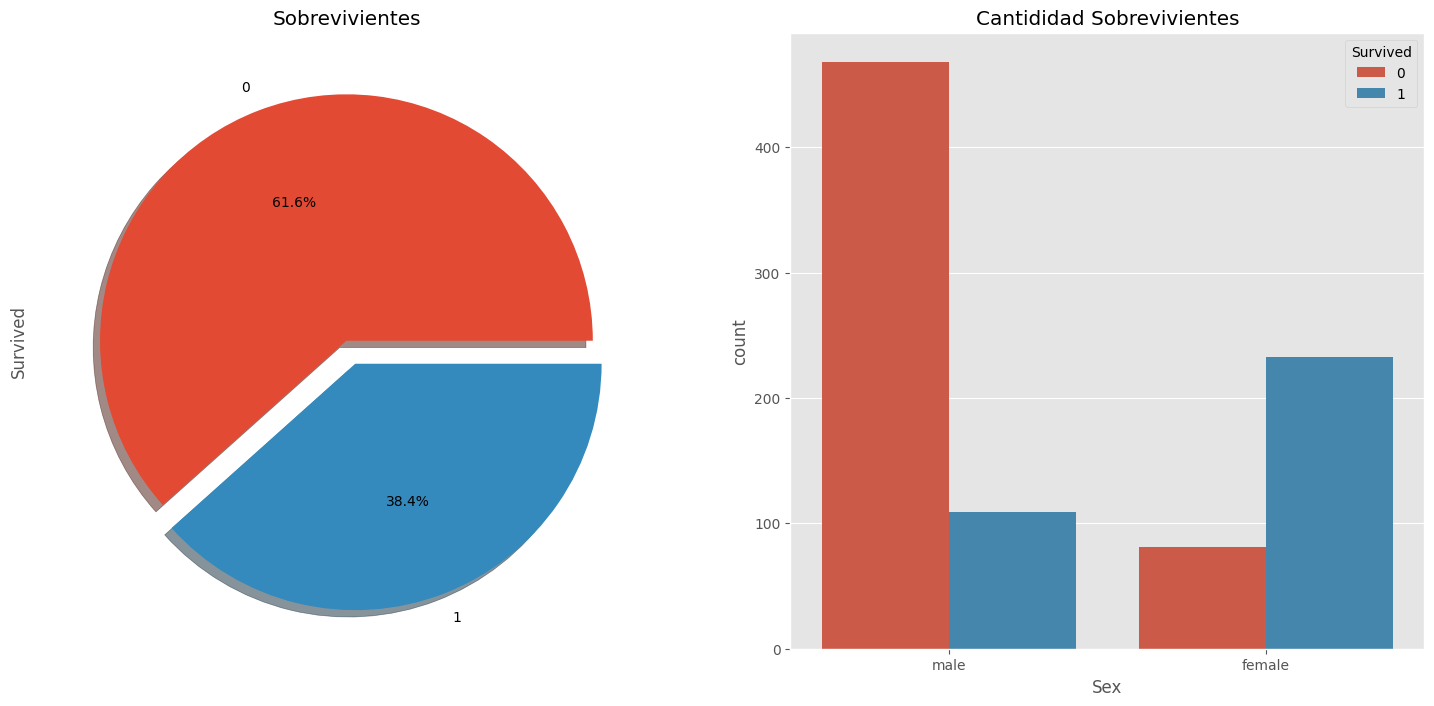

In [127]:
f , ax = plt.subplots (1,2, figsize = (18,8))

df_train['Survived'].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax[0],explode = [0,0.1],shadow = True)
ax[0].set_title('Sobrevivientes')
sns.countplot(x ='Sex',hue = 'Survived', data =df_train, ax = ax[1])
ax[1].set_title('Cantididad Sobrevivientes')



<AxesSubplot:>

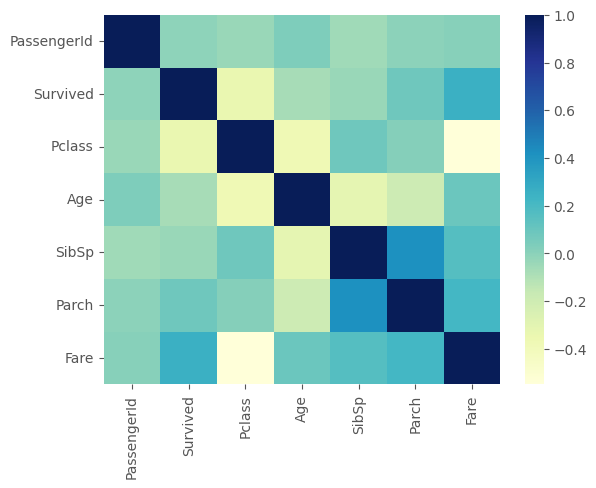

In [128]:
# Podemos ver con este mapa como se correlacionan las variables siendo los mas pscuros los que tienen relacion
sns.heatmap(df_train.corr(),cmap="YlGnBu")

In [83]:
#Verifico los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(df_train).sum().sort_values())
print(pd.isnull(df_test).sum().sort_values())


Datos faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
Fare             1
Age             86
Cabin          327
dtype: int64


In [84]:
#Verifico las estadísticas del dataset
print('Estadísticas del dataset:')
print(df_train.describe())
print(df_test.describe())

Estadísticas del dataset:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp 

In [85]:
# Preprocesado de datos: 
# ==============================================================================
# Aplicar transformaciones necesarias para que los datos puedan ser interpretados por el algoritmo de machine learning 

# Verificamos estos campos deben ser numeros
# Pclass: clase de pasajero primera(1), segunda (2) o tercera (3)
# Age: Edad
# Sex: Sexo del pasajero
# Survived: Indica si el pasajero sobrevivió


#Cambio los datos de sexos en números
df_train['Sex'].replace(['female','male'],[0,1],inplace=True)
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)

#Cambio los datos de embarque en números
df_train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

#Reemplazo los datos faltantes en la edad por la media de esta columna
print(df_train["Age"].mean())
print(df_test["Age"].mean())
promedio = 30
df_train['Age'] = df_train['Age'].replace(np.nan, promedio)
df_test['Age'] = df_test['Age'].replace(np.nan, promedio)

#ddf_train['Age'].fillna(df_train['Age'].mean,inplace = True)
#ddf_test['Age'].fillna(df_test['Age'].mean,inplace = True)



29.69911764705882
30.272590361445783


In [86]:
#Creo varios grupos de acuerdo a bandas de las edades
#Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
df_train['Age'] = pd.cut(df_train['Age'], bins, labels = names)
df_test['Age'] = pd.cut(df_test['Age'], bins, labels = names)
df_test['Age'] = df_test['Age'].apply(np.int64)





In [87]:
#Se elimina la columna de "Cabin" ya que tiene muchos datos perdidos
df_train.drop(['Cabin'], axis = 1, inplace=True)
df_test.drop(['Cabin'], axis = 1, inplace=True)
#Se Elimina columnas que no tienen peso para el analisis
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(['Name','Ticket'], axis=1)
#Se elimina las filas con los datos perdidos
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)

In [88]:
#Verifico los datos
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [89]:
print(df_train.shape)
print(df_test.shape)
print(df_test.head())
print(df_train.head())

(889, 8)
(417, 8)
   PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   5      0      0   7.8292         0
1          893       3    0   6      1      0   7.0000         1
2          894       2    1   7      0      0   9.6875         0
3          895       3    1   5      0      0   8.6625         1
4          896       3    0   4      1      1  12.2875         1
   Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   4      1      0   7.2500       1.0
1         1       1    0   5      1      0  71.2833       2.0
2         1       3    0   5      0      0   7.9250       1.0
3         1       1    0   5      1      0  53.1000       1.0
4         0       3    1   5      0      0   8.0500       1.0


In [90]:
#Separo la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Survived'], 1)) # variables para costruir modelo
y = np.array(df_train['Survived'])   # Resultado

In [91]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar los modelos finales con todos los datos disponibles. 
# ==============================================================================
 
## Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.8016877637130801


In [92]:
# 
## Spporte de Vectores
svc = SVC()
svc.fit (X_train, y_train)
Y_pred = svc.predict(X_test)
print('Presicion Soporte de Vectores:')
print(logreg.score(X_train, y_train))



Presicion Soporte de Vectores:
0.8016877637130801


In [93]:
# 
## Vecinos Mas cercanos

knn = KNeighborsClassifier (n_neighbors=3)
knn.fit (X_train, y_train)
Y_pred = knn.predict(X_test)
print('Presicion Vecinos Mas cercanos:')
print(logreg.score(X_train, y_train))


Presicion Vecinos Mas cercanos:
0.8016877637130801


In [94]:
# Una vez que entrenamos el modelo procedemos a predecir usando los modelos
# ==============================================================================

ids = df_test['PassengerId']

## Regresión logística
prediccion_logreg = logreg.predict(df_test.drop('PassengerId', axis=1))
out_logreg = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logreg })
print(' Predicción Regresión Logística:')
print(out_logreg.head())

 Predicción Regresión Logística:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [95]:
## Spporte de Vectores
prediccion_logsvc = svc.predict(df_test.drop('PassengerId', axis=1))
out_scv = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logsvc })
print(' Predicción Soporte de Vectore:')
print(out_scv.head())

 Predicción Soporte de Vectore:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [99]:
## Vecinos mas cercanos
prediccion_logknn = knn.predict(df_test.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logknn })
print(' Predicción Soporte de Vectore:')
print(out_knn.head())
print (prediccion_logknn)

 Predicción Soporte de Vectore:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1
 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0